In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from tabulate import tabulate

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import NearestNeighbors
from itertools import product
from sklearn.cluster import DBSCAN 

%matplotlib inline


In [5]:
ipl_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [6]:
pd.set_option('display.max_rows', 50)


In [7]:
ipl_df.head(50)


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [8]:
ipl_df['bowling_team'].nunique()


15

In [9]:
ipl_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [10]:
ipl_df.rename(columns={'id': 'match_id'}, inplace=True)


In [11]:
ipl_df.describe().T


,count,mean,std,min,25%,50%,75%,max
match_id,193468.0,756768.808439,306097.091418,335982.0,501227.0,729297.0,1082628.0,1237181.0
inning,193468.0,1.482131,0.499682,1.0,1.0,1.0,2.0,2.0
over,193468.0,9.177027,5.676848,0.0,4.0,9.0,14.0,19.0
ball,193468.0,3.615967,1.807128,1.0,2.0,4.0,5.0,9.0
batsman_runs,193468.0,1.240231,1.610867,0.0,0.0,1.0,1.0,6.0
extra_runs,193468.0,0.066414,0.339991,0.0,0.0,0.0,0.0,7.0
total_runs,193468.0,1.306645,1.598802,0.0,0.0,1.0,1.0,7.0
non_boundary,193468.0,0.000083,0.009094,0.0,0.0,0.0,0.0,1.0
is_wicket,193468.0,0.049078,0.216031,0.0,0.0,0.0,0.0,1.0


In [12]:
ipl_df.describe(include="object")


,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193468,193468,193468,9495,9495,6784,10233,193468,193277
unique,537,530,420,9,506,879,5,15,15
top,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma,MS Dhoni,wides,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,5743,167,164,5858,24466,24453


Top 5 Highest Scoring Teams:
batting_team
Mumbai Indians                 32286
Royal Challengers Bangalore    30214
Kings XI Punjab                30017
Kolkata Knight Riders          29383
Chennai Super Kings            28363
Name: total_runs, dtype: int64 



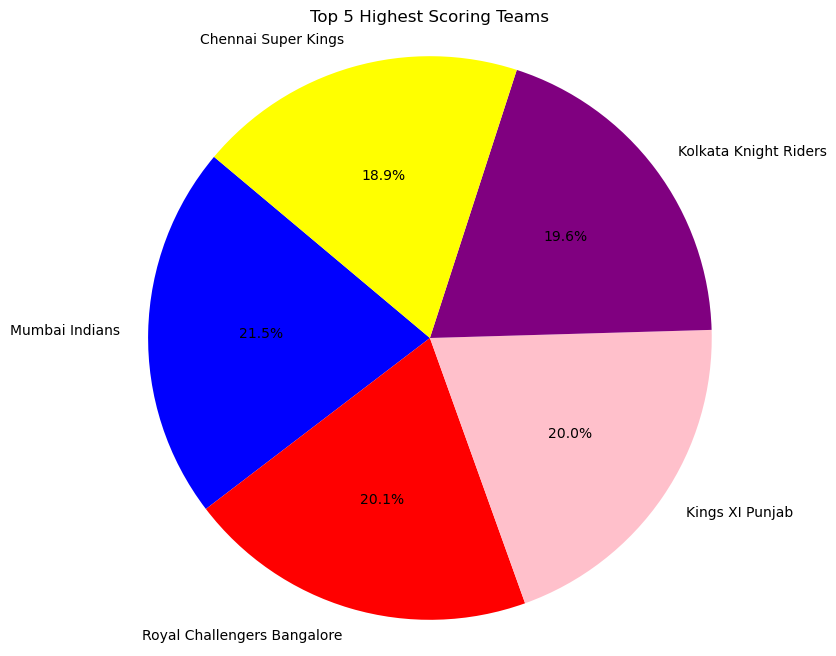

In [13]:
# Group the dataset by the batting team's name
team_stats = ipl_df.groupby('batting_team')

# Calculate the total runs scored by each team
total_runs_by_team = team_stats['total_runs'].sum()

# Sort the teams based on the total runs scored in descending order
top_scoring_teams = total_runs_by_team.sort_values(ascending=False)

# Select the top 5 highest-scoring teams
top_5_teams = top_scoring_teams.head(5)

# Display the top 5 highest-scoring teams
print("Top 5 Highest Scoring Teams:")
print(top_5_teams,"\n")

# Create a pie chart
colors = ['blue', 'red', 'pink', 'purple', 'yellow']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(top_5_teams, labels=top_5_teams.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Highest Scoring Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The Top 10 Batsmen in the Tournament are:
             batsman  Runs
505         V Kohli  5878
438        SK Raina  5368
116       DA Warner  5254
379       RG Sharma  5230
407        S Dhawan  5197
24   AB de Villiers  4849
96         CH Gayle  4772
301        MS Dhoni  4632
398      RV Uthappa  4607
154       G Gambhir  4217


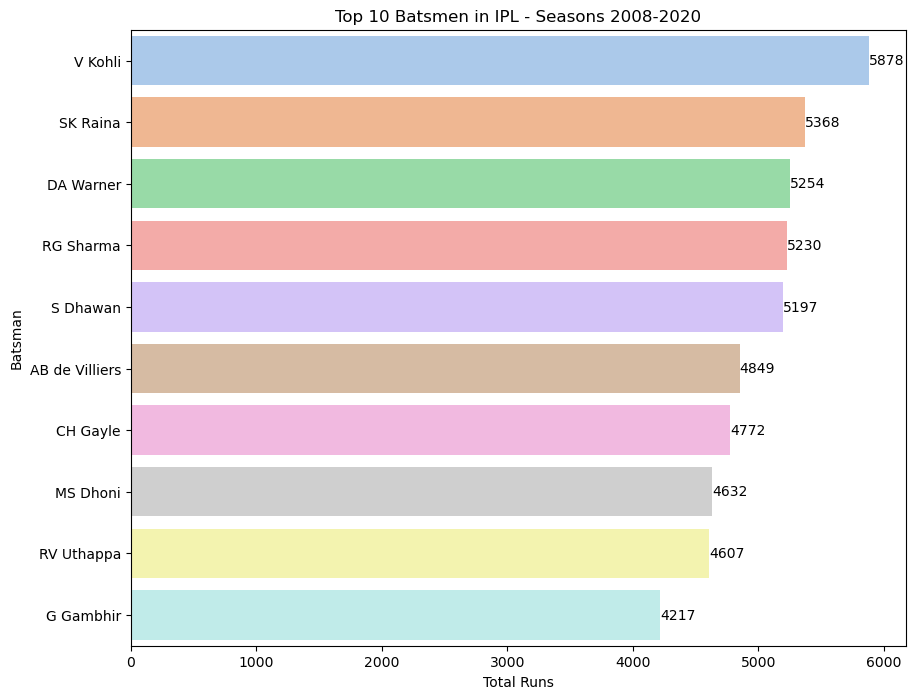

In [14]:
# Group by batsman and calculate total runs
batting_tot = ipl_df.groupby('batsman')['batsman_runs'].sum().reset_index(name='Runs')

# Sort the dataframe by Runs in descending order
batting_sorted = batting_tot.sort_values(by='Runs', ascending=False)

# Select top 10 batsmen
top_batsmen = batting_sorted.head(10)

# Print top 10 batsmen
print('The Top 10 Batsmen in the Tournament are:\n', top_batsmen)

# Plotting

# Create a custom color palette
colors = sns.color_palette('pastel')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=top_batsmen, y='batsman', x='Runs', palette=colors)

# Add annotations
for index, value in enumerate(top_batsmen['Runs']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Customize labels and title
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen in IPL - Seasons 2008-2020')

# Show the plot
plt.show()

Top 10 High Wicket-Taking Bowlers:
bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: is_wicket, dtype: int64


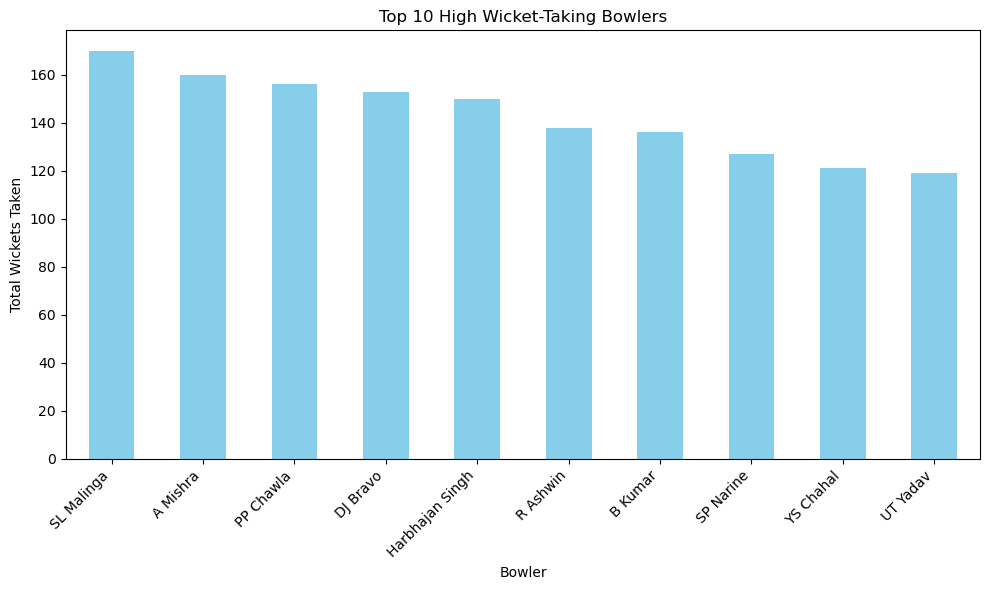

In [15]:
# Filter out the instances where dismissal_kind is 'run out'
filtered_ipl_df = ipl_df[ipl_df['dismissal_kind'] != 'run out']

# Group the filtered dataset by bowler's name
bowler_stats = filtered_ipl_df.groupby('bowler')

# Calculate the total number of wickets taken by each bowler
wickets_taken = bowler_stats['is_wicket'].sum()

# Sort the bowlers based on the number of wickets in descending order
top_bowlers = wickets_taken.sort_values(ascending=False)

# Select the top 10 bowlers
top_10_bowlers = top_bowlers.head(10)

# Display the top 10 bowlers
print("Top 10 High Wicket-Taking Bowlers:")
print(top_10_bowlers)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_bowlers.plot(kind='bar', color='skyblue')
plt.title('Top 10 High Wicket-Taking Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Best Fielders:
fielder
MS Dhoni          164
KD Karthik        156
RV Uthappa        123
AB de Villiers    117
SK Raina          105
RG Sharma          92
PA Patel           91
KA Pollard         88
V Kohli            83
WP Saha            83
dtype: int64


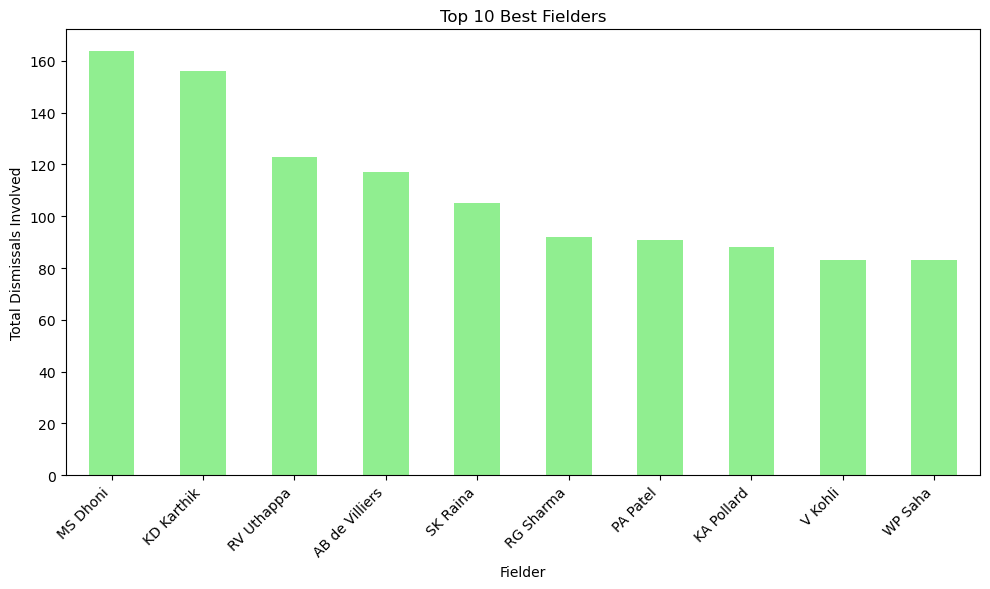

In [18]:


# Filter the dataset to include only instances where a fielder is involved in a dismissal
dismissals_with_fielder = ipl_df[ipl_df['fielder'].notnull()]

# Group the filtered dataset by the fielder's name
fielder_stats = dismissals_with_fielder.groupby('fielder')

# Calculate the total number of dismissals in which each fielder was involved
dismissals_count = fielder_stats.size()

# Sort the fielders based on the number of dismissals in descending order
top_fielders = dismissals_count.sort_values(ascending=False)

# Select the top 5 fielders
top_10_fielders = top_fielders.head(10)

# Display the top 5 fielders
print("Top 10 Best Fielders:")
print(top_10_fielders)


# Plotting
plt.figure(figsize=(10, 6))
top_10_fielders.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Best Fielders')
plt.xlabel('Fielder')
plt.ylabel('Total Dismissals Involved')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
ipl_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [20]:
ipl_df['bowling_team'].unique()


array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [21]:
# Define replacements using a dictionary
team_replacements = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals'
}

# Apply replacements to 'batting_team' and 'bowling_team' columns
ipl_df['batting_team'].replace(team_replacements, inplace=True)
ipl_df['bowling_team'].replace(team_replacements, inplace=True)

In [23]:
# checking for null values 
null = pd.DataFrame({'Null Values' : ipl_df.isna().sum(), 'Percentage Null Values' : (ipl_df.isna().sum()) /len(ipl_df) * (100)})
null

,Null Values,Percentage Null Values
match_id,0,0.000000
inning,0,0.000000
over,0,0.000000
ball,0,0.000000
batsman,0,0.000000
non_striker,0,0.000000
bowler,0,0.000000
batsman_runs,0,0.000000
extra_runs,0,0.000000
total_runs,0,0.000000


In [24]:
ipl_df['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [25]:
#  Check if NaN values in 'dismissal_kind' correspond to 'is_wicket' == 0
nan_dismissal = ipl_df[ipl_df['dismissal_kind'].isna() & (ipl_df['is_wicket'] == 0)]
print("Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0:", len(nan_dismissal))

Number of rows where 'dismissal_kind' is NaN and 'is_wicket' is 0: 183973


In [26]:
# Fill NaN values in 'dismissal_kind' with 'not out'
ipl_df['dismissal_kind'].fillna('not out', inplace=True)

In [31]:
#  Check if NaN values in 'dismissal_kind' correspond to 'is_wicket' == 0
nan_player_dismissed = ipl_df[ipl_df['player_dismissed'].isna() & (ipl_df['is_wicket'] == 0)]
print("Number of rows where 'player_dismissed' is NaN and 'is_wicket' is 0:", len(nan_player_dismissed))

Number of rows where 'player_dismissed' is NaN and 'is_wicket' is 0: 0


In [32]:
# Fill missing values in 'player_dismissed' with 'Not Applicable' or any other suitable value
ipl_df['player_dismissed'].fillna('Not Out', inplace=True)

In [33]:
ipl_df['extras_type'].unique()


array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

In [34]:
ipl_df['extras_type'].fillna('standard', inplace=True)


In [36]:
ipl_df['bowling_team'].unique()


array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions'],
      dtype=object)

In [37]:
ipl_df.dropna(subset=['bowling_team'],inplace=True)


In [38]:
# Calculate the number of matches played by each batsman
num_matches = ipl_df.groupby('batsman')['match_id'].nunique()

# Calculate the total runs scored by each batsman
total_runs_by_batsman = ipl_df.groupby('batsman')['batsman_runs'].sum()

# Calculate the number of balls faced by each batsman
balls_faced_by_batsman = ipl_df.groupby('batsman')['ball'].count()

# Calculate strike rate for each batsman
strike_rate = (total_runs_by_batsman / balls_faced_by_batsman) * 100

# Calculate the number of sixes hit by each batsman
num_sixes = ipl_df[ipl_df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()

# Calculate the number of fours scored by each batsman
num_fours = ipl_df[ipl_df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()

# Select relevant features for clustering
batsman_data = pd.DataFrame({'matches_played': num_matches,
                             'total_runs': total_runs_by_batsman,
                             'balls_faced': balls_faced_by_batsman,
                             'strike_rate': strike_rate,
                             'sixes': num_sixes,
                             'fours': num_fours})

# Fill NaN values in 'sixes' and 'fours' columns with 0
batsman_data['sixes'] = batsman_data['sixes'].fillna(0)
batsman_data['fours'] = batsman_data['fours'].fillna(0)

In [39]:
batsman_data.reset_index(inplace=True)
batsman_data.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0
1,A Chandila,2,4,7,57.142857,0.0,0.0
2,A Chopra,6,53,75,70.666667,0.0,7.0
3,A Choudhary,3,25,20,125.000000,1.0,1.0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0


In [40]:
batsman_data.columns

Index(['batsman', 'matches_played', 'total_runs', 'balls_faced', 'strike_rate',
       'sixes', 'fours'],
      dtype='object')

In [41]:
batsman_data.shape[0]

537

In [42]:
batsman_data_cleaned_DBSCAN = batsman_data.copy()

In [43]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
batsman_data['Outlier_Scores'] = model.fit_predict(batsman_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
batsman_data['Is_Outlier'] = [1 if x == -1 else 0 for x in batsman_data['Outlier_Scores']]

# Display the first few rows of the batsman_data dataframe
batsman_data.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,Outlier_Scores,Is_Outlier
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0,1,0
1,A Chandila,2,4,7,57.142857,0.0,0.0,1,0
2,A Chopra,6,53,75,70.666667,0.0,7.0,1,0
3,A Choudhary,3,25,20,125.000000,1.0,1.0,1,0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0,1,0


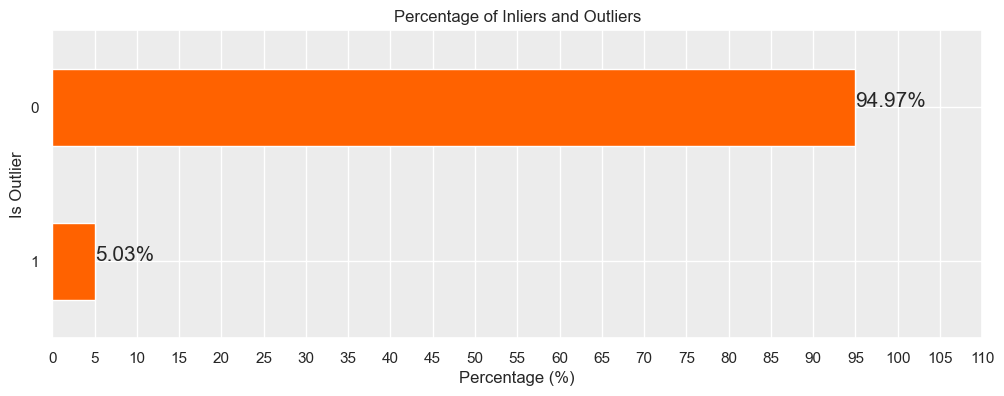

In [44]:
# Calculate the percentage of inliers and outliers
sns.set(style='darkgrid', rc={'axes.facecolor': '#ececec'})

outlier_percentage = batsman_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [45]:
# Getting the number of rows in the cleaned customer dataset
batsman_data.shape[0]


537

In [46]:
batsman_data.drop(columns=['Outlier_Scores', 'Is_Outlier'], axis=1, inplace=True)

In [47]:
batsman_data_cleaned = batsman_data.copy()

In [48]:
batsman_data_cleaned


,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0
1,A Chandila,2,4,7,57.142857,0.0,0.0
2,A Chopra,6,53,75,70.666667,0.0,7.0
3,A Choudhary,3,25,20,125.000000,1.0,1.0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0
...,...,...,...,...,...,...,...
532,YV Takawale,10,192,183,104.918033,3.0,26.0
533,Yashpal Singh,4,47,67,70.149254,0.0,5.0
534,Younis Khan,1,3,7,42.857143,0.0,0.0
535,Yuvraj Singh,126,2750,2205,124.716553,149.0,217.0


In [49]:
batsman_data_cleaned.isnull().sum()


batsman           0
matches_played    0
total_runs        0
balls_faced       0
strike_rate       0
sixes             0
fours             0
dtype: int64

In [51]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['batsman']

# List of columns that need to be scaled
columns_to_scale = batsman_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
batsman_data_scaled = batsman_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
batsman_data_scaled[columns_to_scale] = scaler.fit_transform(batsman_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
batsman_data_scaled.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


In [ ]:
# Set the color palette for the plot
# sns.set_palette(['#0041c2'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(batsman_data_scaled.iloc[:,1:])

# Finalize and render the figure
visualizer.show();

In [57]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(batsman_data_scaled.iloc[:,1:])

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {3: 0, 2: 1, 1: 2, 0: 3}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
batsman_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the Scaled of the dataset
batsman_data_scaled['cluster'] = new_labels

In [58]:
# Display the first few rows of the original dataframe
batsman_data_cleaned.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,cluster
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0,3
1,A Chandila,2,4,7,57.142857,0.0,0.0,1
2,A Chopra,6,53,75,70.666667,0.0,7.0,1
3,A Choudhary,3,25,20,125.000000,1.0,1.0,3
4,A Dananjaya,1,4,5,80.000000,0.0,0.0,1


In [59]:
# Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned[(batsman_data_cleaned['total_runs'] > 2500) & (batsman_data_cleaned['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(player)
    print() 

Cluster(s) containing the best IPL players of all time:
Cluster 2:
AB de Villiers
AM Rahane
AT Rayudu
BB McCullum
CH Gayle
DA Warner
G Gambhir
KA Pollard
KD Karthik
MK Pandey
MS Dhoni
PA Patel
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SR Watson
V Kohli
YK Pathan
Yuvraj Singh

Cluster 0:
M Vijay
SV Samson
V Sehwag



In [60]:
# Compute number of batsman
num_observations = len(batsman_data_scaled.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled['cluster']

# Compute the metrics
kmeans_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", kmeans_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         537         |
|    Silhouette Score     | 0.46154297343431194 |
| Calinski Harabasz Score |  847.918425215511   |
|  Davies Bouldin Score   |  0.696073794916246  |
+-------------------------+---------------------+


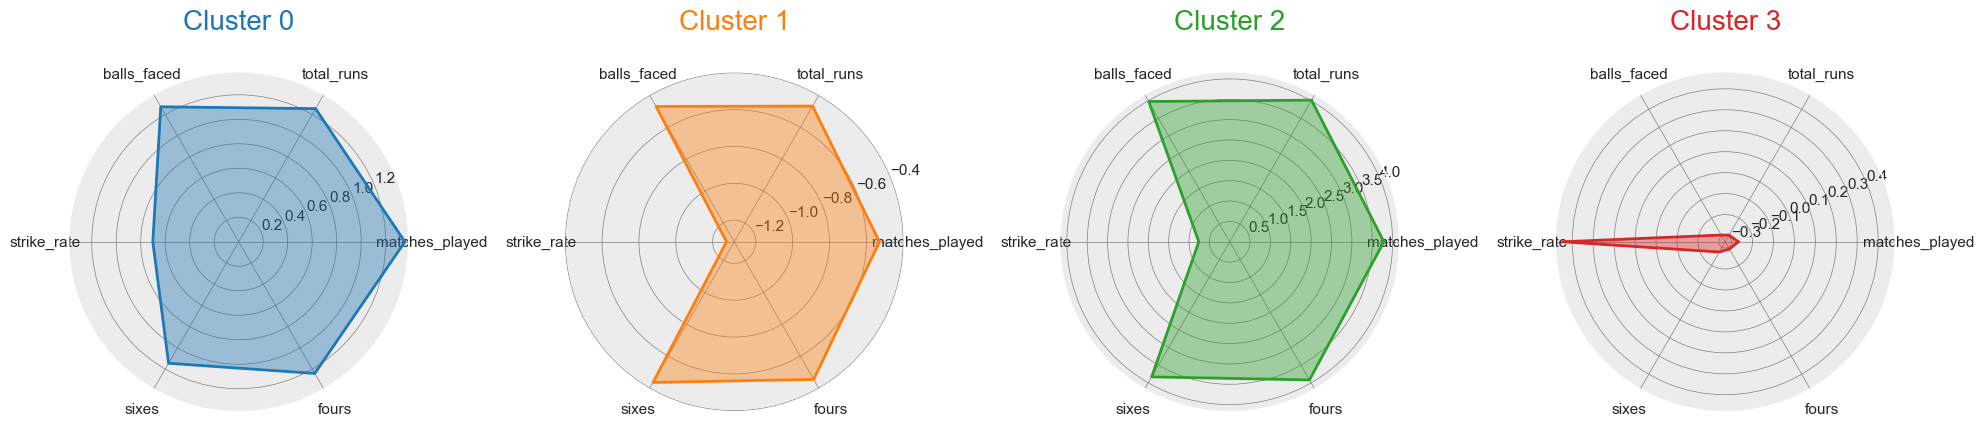

In [61]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(sns.color_palette('tab10', n_colors=4)):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

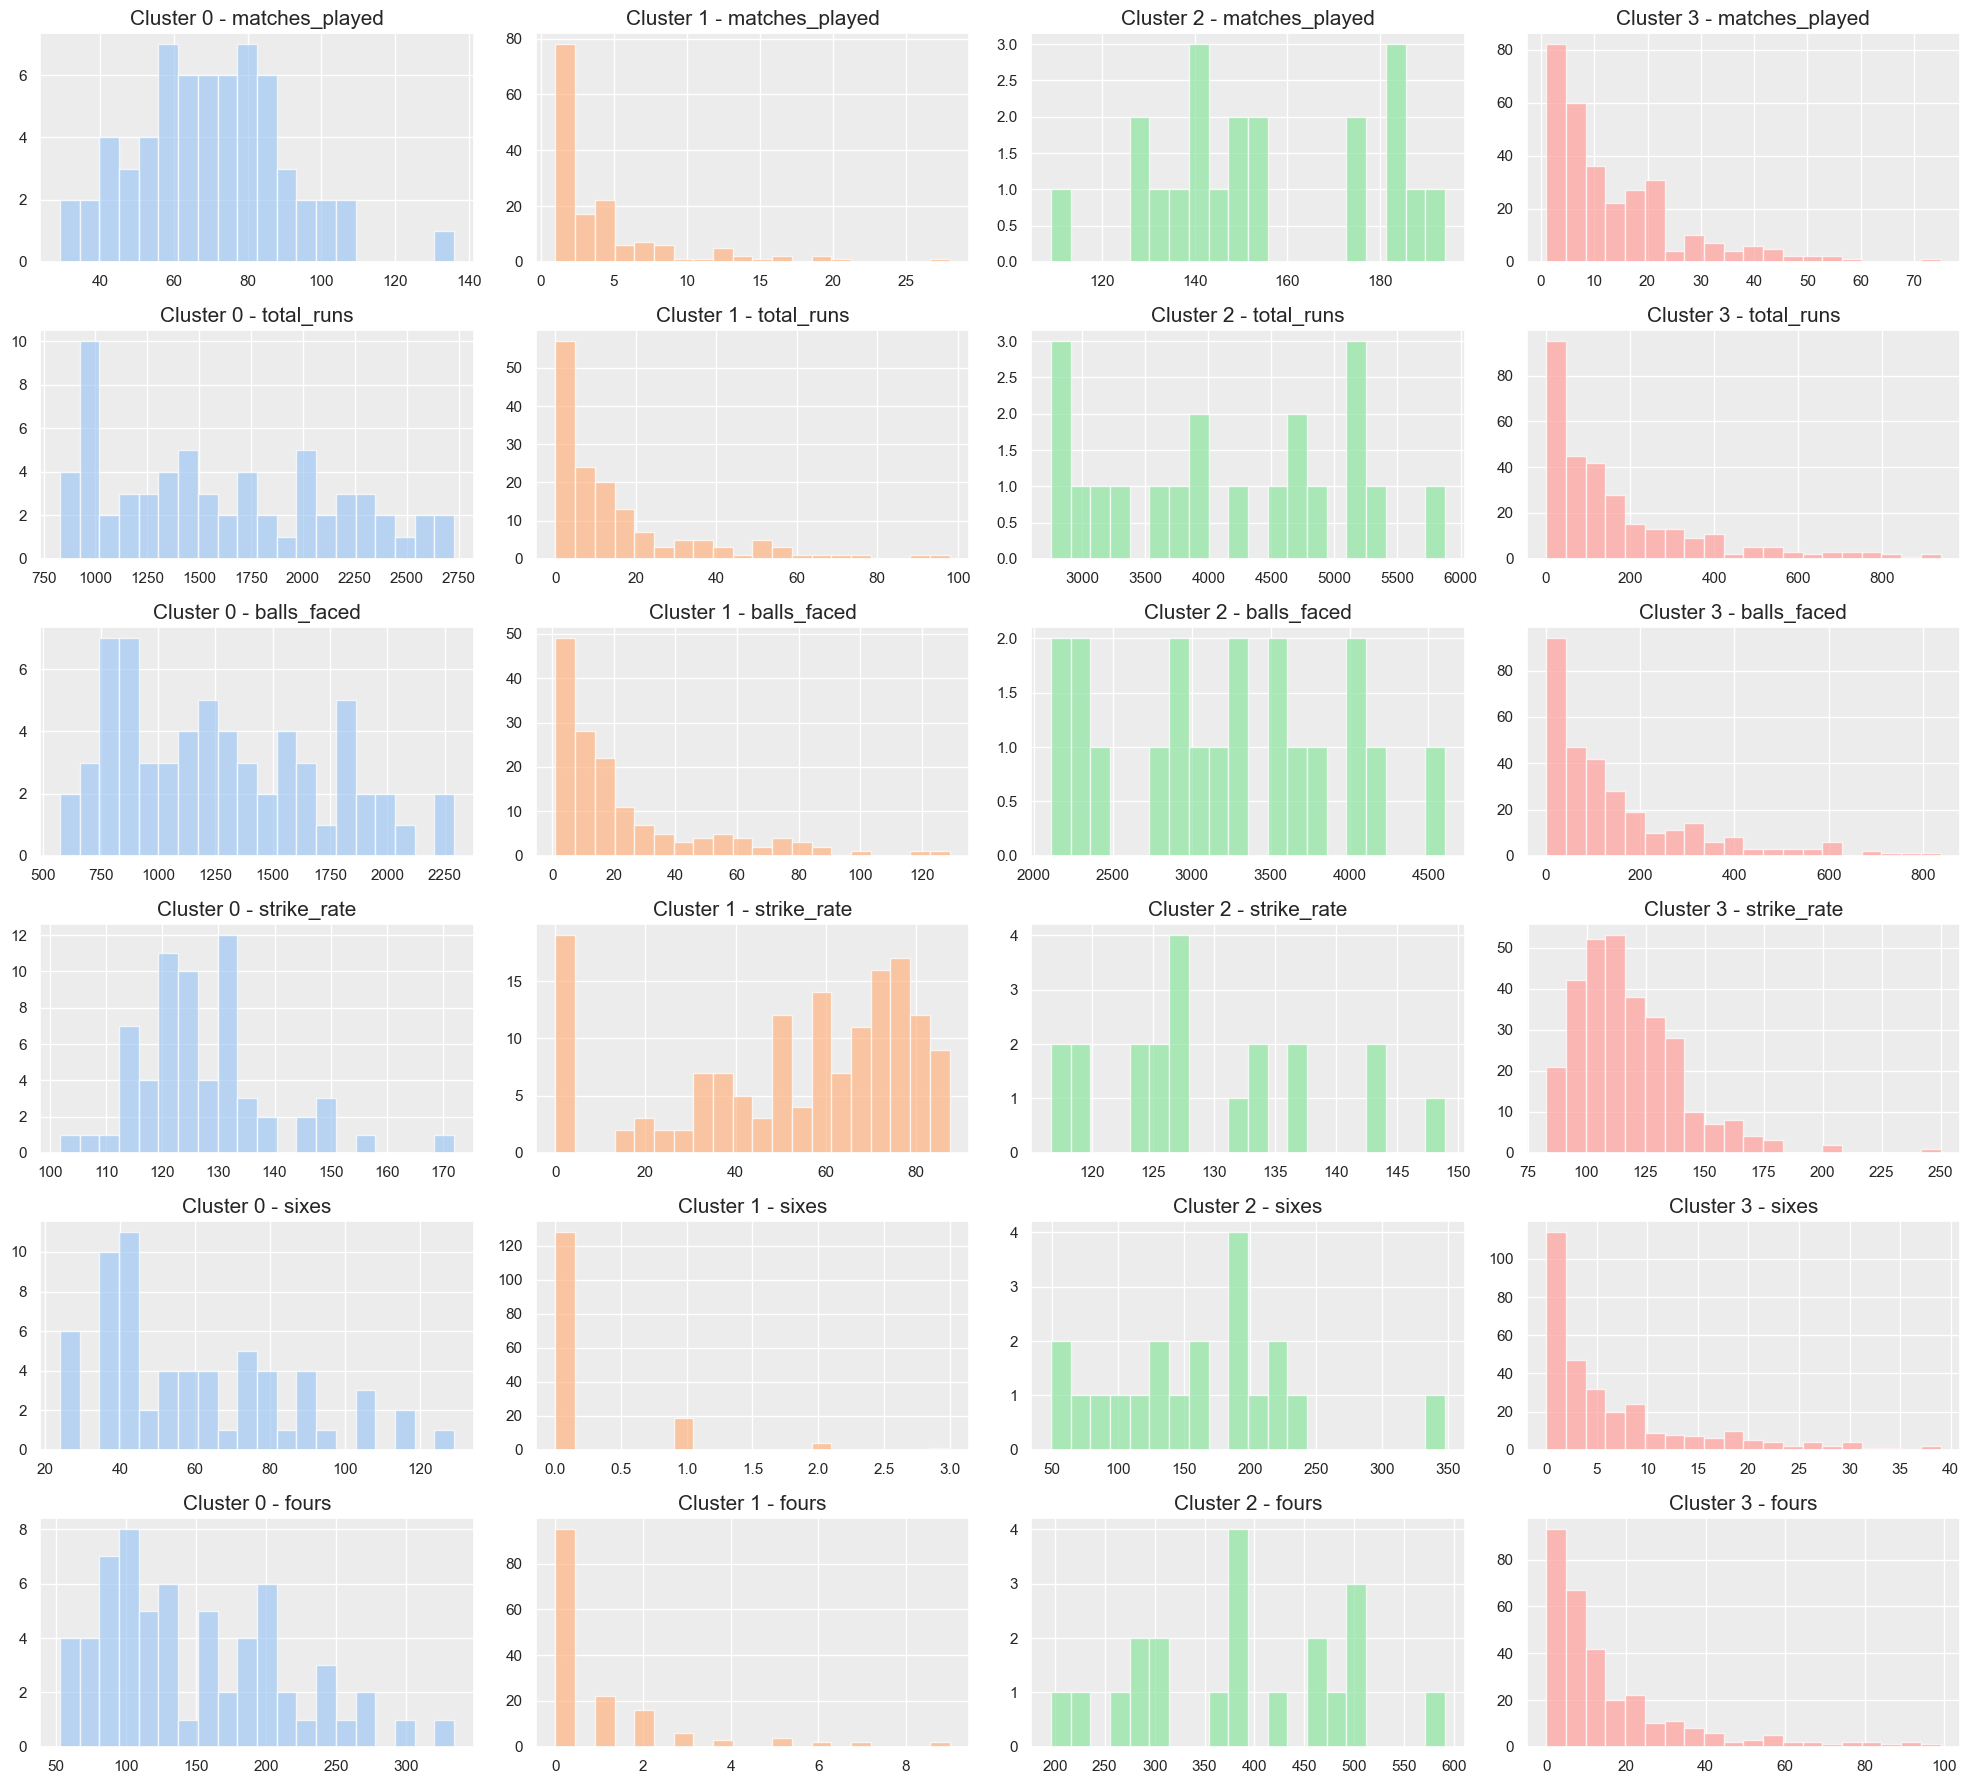

In [63]:
# Plot histograms for each feature segmented by the clusters
features = batsman_data_cleaned.columns[1:-1]
clusters = batsman_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned[batsman_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

In [64]:
batsman_data_scaled_hie = batsman_data_scaled.drop('cluster', axis=1).copy()
batsman_data_cleaned_hie = batsman_data_cleaned.drop('cluster',axis=1).copy()

batsman_data_scaled_hie.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


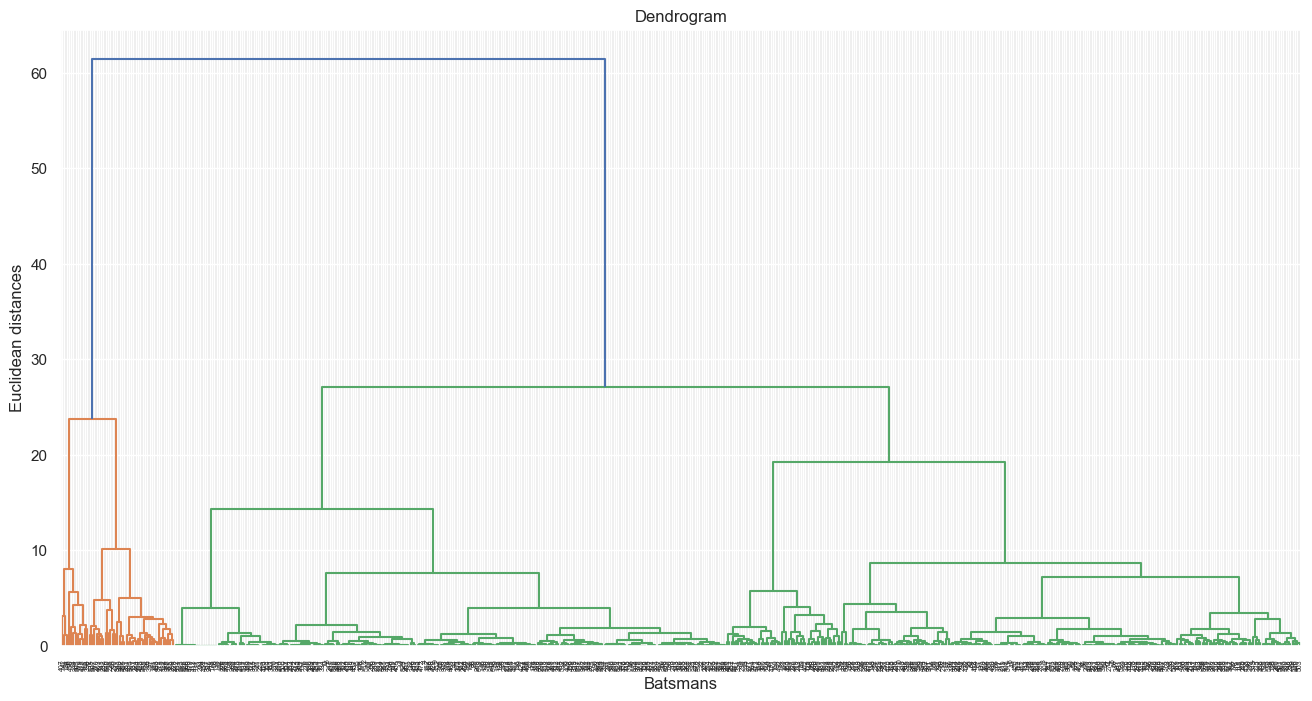

In [65]:
# Let us plot the dendrogram for the batsman dataset after dropping 
# the “batsman” column.


X = batsman_data_scaled_hie.drop(['batsman'], axis=1)

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Batsmans')
plt.ylabel('Euclidean distances')
plt.show()

In [66]:
## Instantiate Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

## Fit and predict the cluster for each data point
batsman_data_cleaned_hie["cluster"] = agg_cluster.fit_predict(X)
batsman_data_scaled_hie["cluster"] = agg_cluster.fit_predict(X)

In [67]:
batsman_data_scaled_hie["cluster"].nunique()

4

In [68]:
#  Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_hie[(batsman_data_cleaned_hie['total_runs'] > 2500) & (batsman_data_cleaned_hie['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(player)
    print() 

Cluster(s) containing the best IPL players of all time:
Cluster 3:
AB de Villiers
AM Rahane
CH Gayle
DA Warner
G Gambhir
MS Dhoni
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SR Watson
V Kohli

Cluster 1:
AT Rayudu
BB McCullum
KA Pollard
KD Karthik
M Vijay
MK Pandey
PA Patel
SV Samson
V Sehwag
YK Pathan
Yuvraj Singh



In [69]:
# Compute number of batsman
num_observations = len(batsman_data_scaled_hie.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled_hie.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled_hie['cluster']

# Compute the metrics
hierarchical_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", hierarchical_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         537         |
|    Silhouette Score     | 0.38071792004174076 |
| Calinski Harabasz Score |  655.9438724328918  |
|  Davies Bouldin Score   | 0.8174273505528831  |
+-------------------------+---------------------+


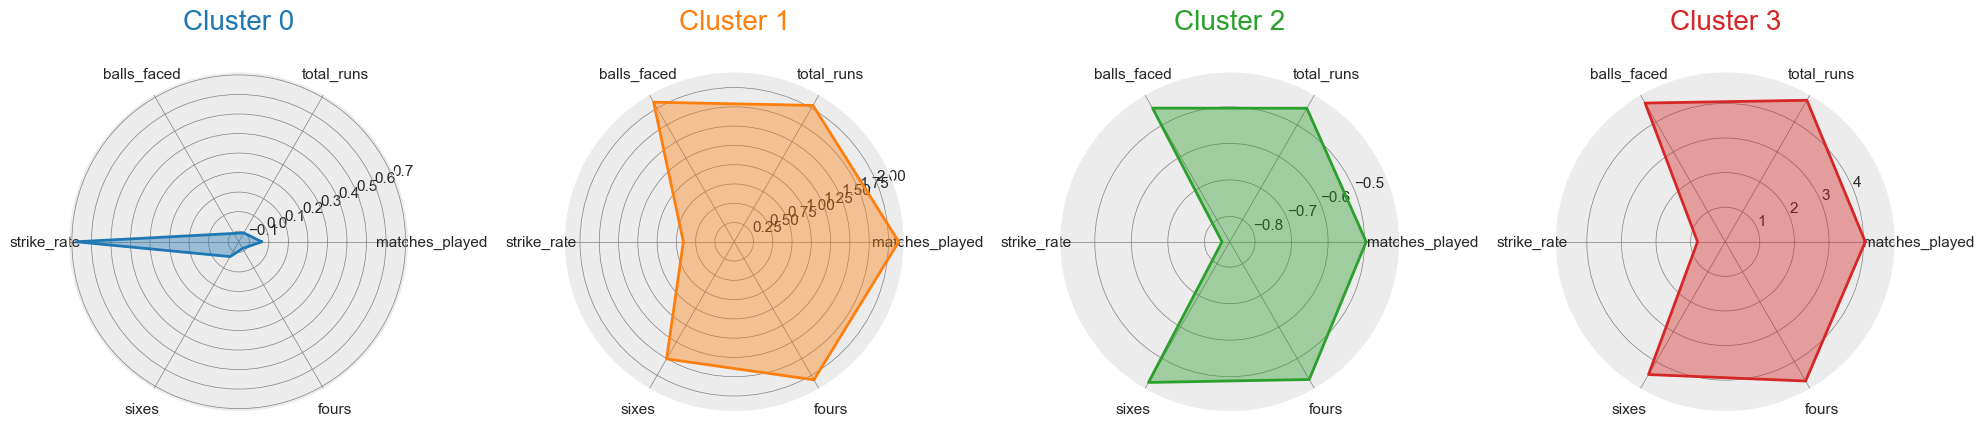

In [70]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned_hie.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(sns.color_palette('tab10', n_colors=4)):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

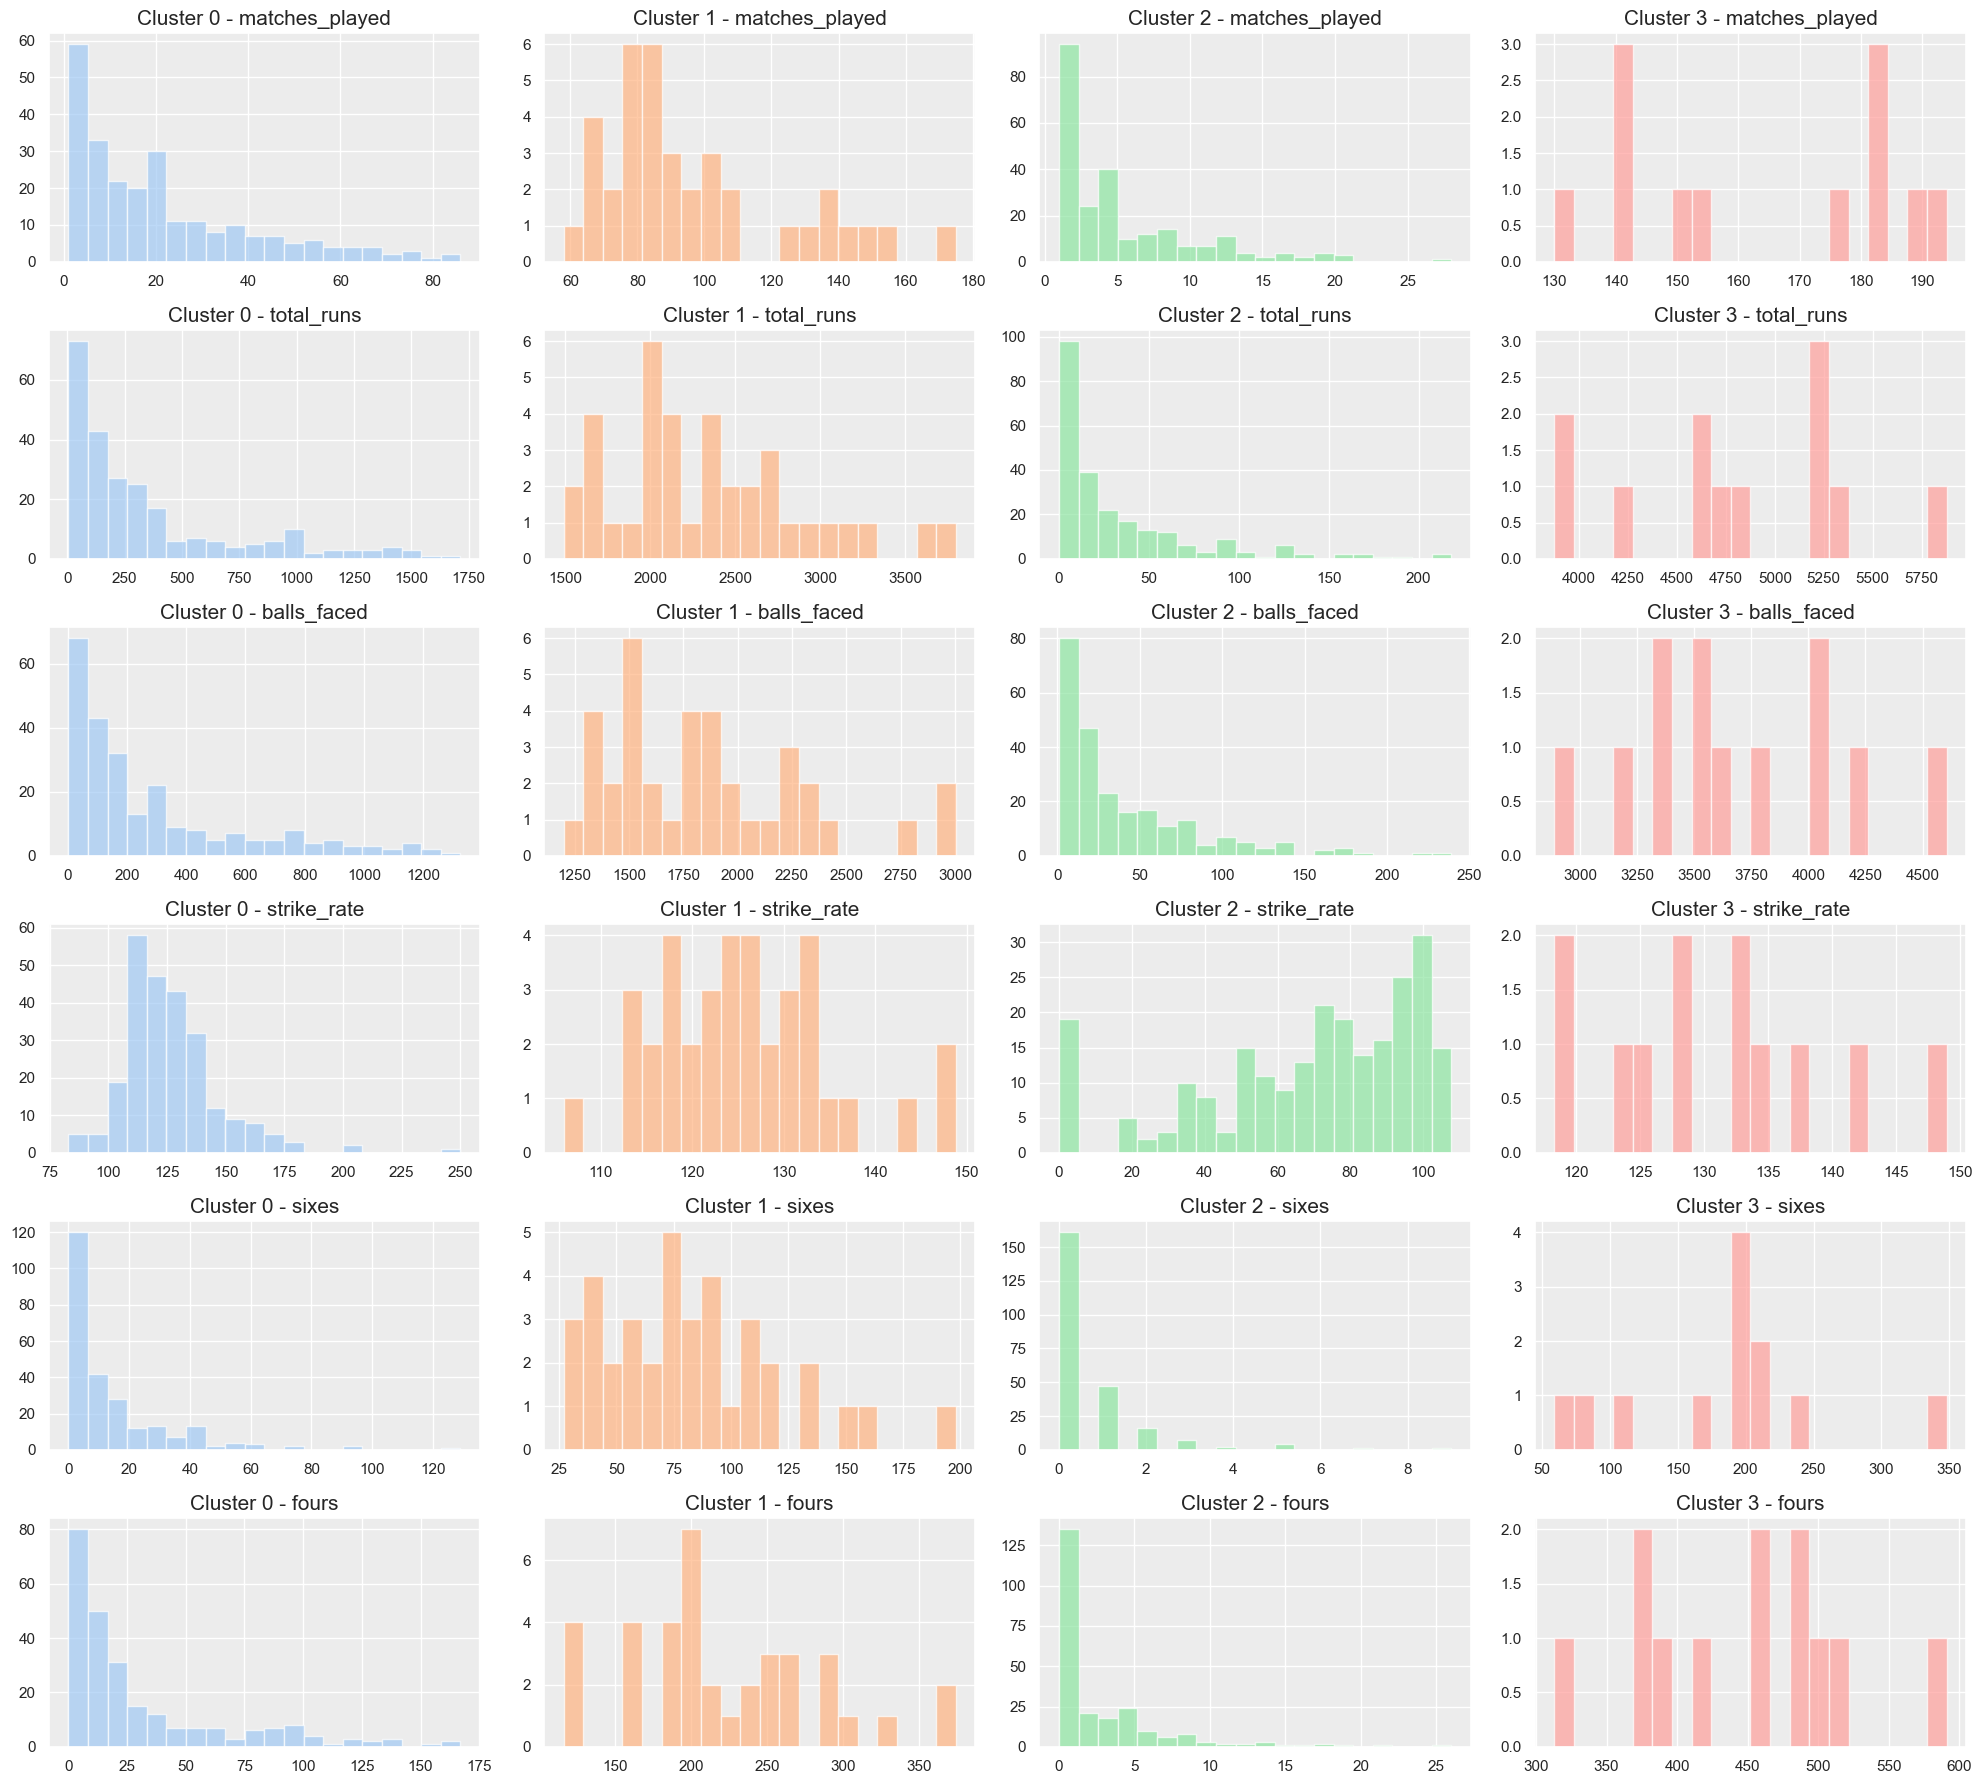

In [71]:
# Plot histograms for each feature segmented by the clusters
features = batsman_data_cleaned_hie.columns[1:-1]
clusters = batsman_data_cleaned_hie['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned_hie[batsman_data_cleaned_hie['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

In [72]:
batsman_data_scaled_DBSCAN = batsman_data_scaled.drop('cluster', axis=1).copy()
batsman_data_cleaned_DBSCAN.head()

,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,23,280,196,142.857143,15.0,16.0
1,A Chandila,2,4,7,57.142857,0.0,0.0
2,A Chopra,6,53,75,70.666667,0.0,7.0
3,A Choudhary,3,25,20,125.000000,1.0,1.0
4,A Dananjaya,1,4,5,80.000000,0.0,0.0


In [73]:
batsman_data_scaled_DBSCAN.head()


,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,A Ashish Reddy,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,A Chandila,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,A Chopra,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,A Choudhary,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,A Dananjaya,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


In [74]:
X = batsman_data_scaled_DBSCAN.drop(['batsman'], axis=1)
X.head()

,matches_played,total_runs,balls_faced,strike_rate,sixes,fours
0,0.010804,-0.180097,-0.228419,1.117357,-0.041612,-0.282778
1,-0.592359,-0.478838,-0.491787,-1.165316,-0.440646,-0.465622
2,-0.477471,-0.425801,-0.397030,-0.805161,-0.440646,-0.385628
3,-0.563637,-0.456108,-0.473672,0.641800,-0.414044,-0.454194
4,-0.621081,-0.478838,-0.494574,-0.556603,-0.440646,-0.465622


In [75]:
# lets find all the nearest neighbours of a given point
neighbors = NearestNeighbors(n_neighbors=20)
# fit the nearest neighbours
neighbors_fit = neighbors.fit(X)
# lets find out the distances
distances, indices = neighbors_fit.kneighbors(X)

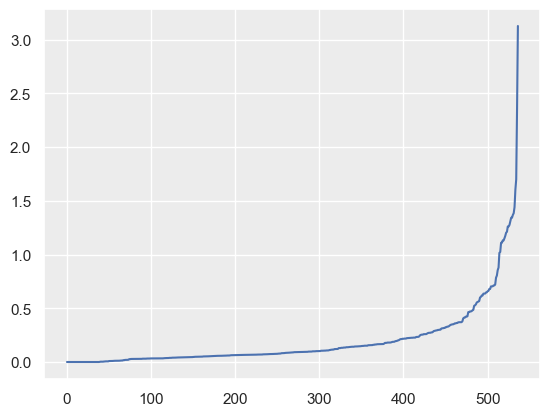

In [76]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [77]:
# import dbscan
from sklearn.cluster import DBSCAN
# eps=1.4 as suggested by our plot
db = DBSCAN(eps=1.4, min_samples=10).fit(X)
# lets get the labels out
labels = db.labels_

In [78]:
batsman_data_scaled_DBSCAN['cluster'] = labels
batsman_data_cleaned_DBSCAN['cluster'] = labels

In [79]:
batsman_data_scaled_DBSCAN['cluster'].unique()

array([ 0, -1], dtype=int64)

In [81]:
#  Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_DBSCAN[(batsman_data_cleaned_DBSCAN['total_runs'] > 2500) & (batsman_data_cleaned_DBSCAN['matches_played'] >= 100)]

# Identify the cluster(s) containing the filtered players
best_players_cluster = filtered_data['cluster'].unique()

# Analyze the characteristics of the players in the identified cluster(s)
print("Cluster(s) containing the best IPL players of all time:")
for cluster in best_players_cluster:
    players_in_cluster = filtered_data[filtered_data['cluster'] == cluster]['batsman'].tolist()
    print(f"Cluster {cluster}:")
    for player in players_in_cluster:
        print(player)
    print() 

Cluster(s) containing the best IPL players of all time:
Cluster -1:
AB de Villiers
AM Rahane
AT Rayudu
CH Gayle
DA Warner
G Gambhir
KA Pollard
KD Karthik
MK Pandey
MS Dhoni
PA Patel
RG Sharma
RV Uthappa
S Dhawan
SK Raina
SR Watson
V Kohli
YK Pathan
Yuvraj Singh

Cluster 0:
BB McCullum
M Vijay
SV Samson
V Sehwag



In [82]:
# Compute number of batsman
num_observations = len(batsman_data_scaled_DBSCAN.iloc[:,1:])

# Separate the features and the cluster labels
X = batsman_data_scaled_DBSCAN.drop(['cluster','batsman'], axis=1)
clusters = batsman_data_scaled_DBSCAN['cluster']

# Compute the metrics
dbscan_silhouette_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)


# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", dbscan_silhouette_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        537         |
|    Silhouette Score     | 0.768603088434956  |
| Calinski Harabasz Score | 503.99186733022515 |
|  Davies Bouldin Score   | 0.4228871502368679 |
+-------------------------+--------------------+


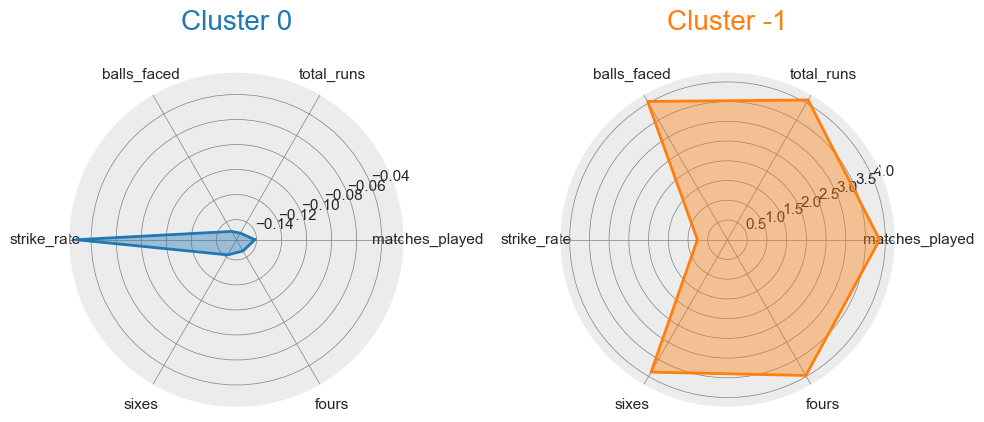

In [83]:
# Setting 'batsman' column as index and assigning it to a new dataframe
df_batsman = batsman_data_cleaned_DBSCAN.set_index('batsman')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_batsman_standardized = scaler.fit_transform(df_batsman.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_batsman_standardized = pd.DataFrame(df_batsman_standardized, columns=df_batsman.columns[:-1], index=df_batsman.index)
df_batsman_standardized['cluster'] = df_batsman['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_batsman_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
    
# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True), nrows=1, ncols=2)

# Create radar chart for each cluster
for i, color in enumerate(['tab:blue', 'tab:orange']): # Adjust colors as needed
    cluster_label = i if i == 0 else -1  # Map cluster index to cluster label
    data = cluster_centroids.loc[cluster_label].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, cluster_label)

    # Add input data
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

    # Add a grid
    ax[i].grid(color='grey', linewidth=0.5)

# Add titles
ax[0].set_title('Cluster 0', color='tab:blue', size=20, y=1.1)
ax[1].set_title('Cluster -1', color='tab:orange', size=20, y=1.1)

# Display the plot
plt.tight_layout()
plt.show()

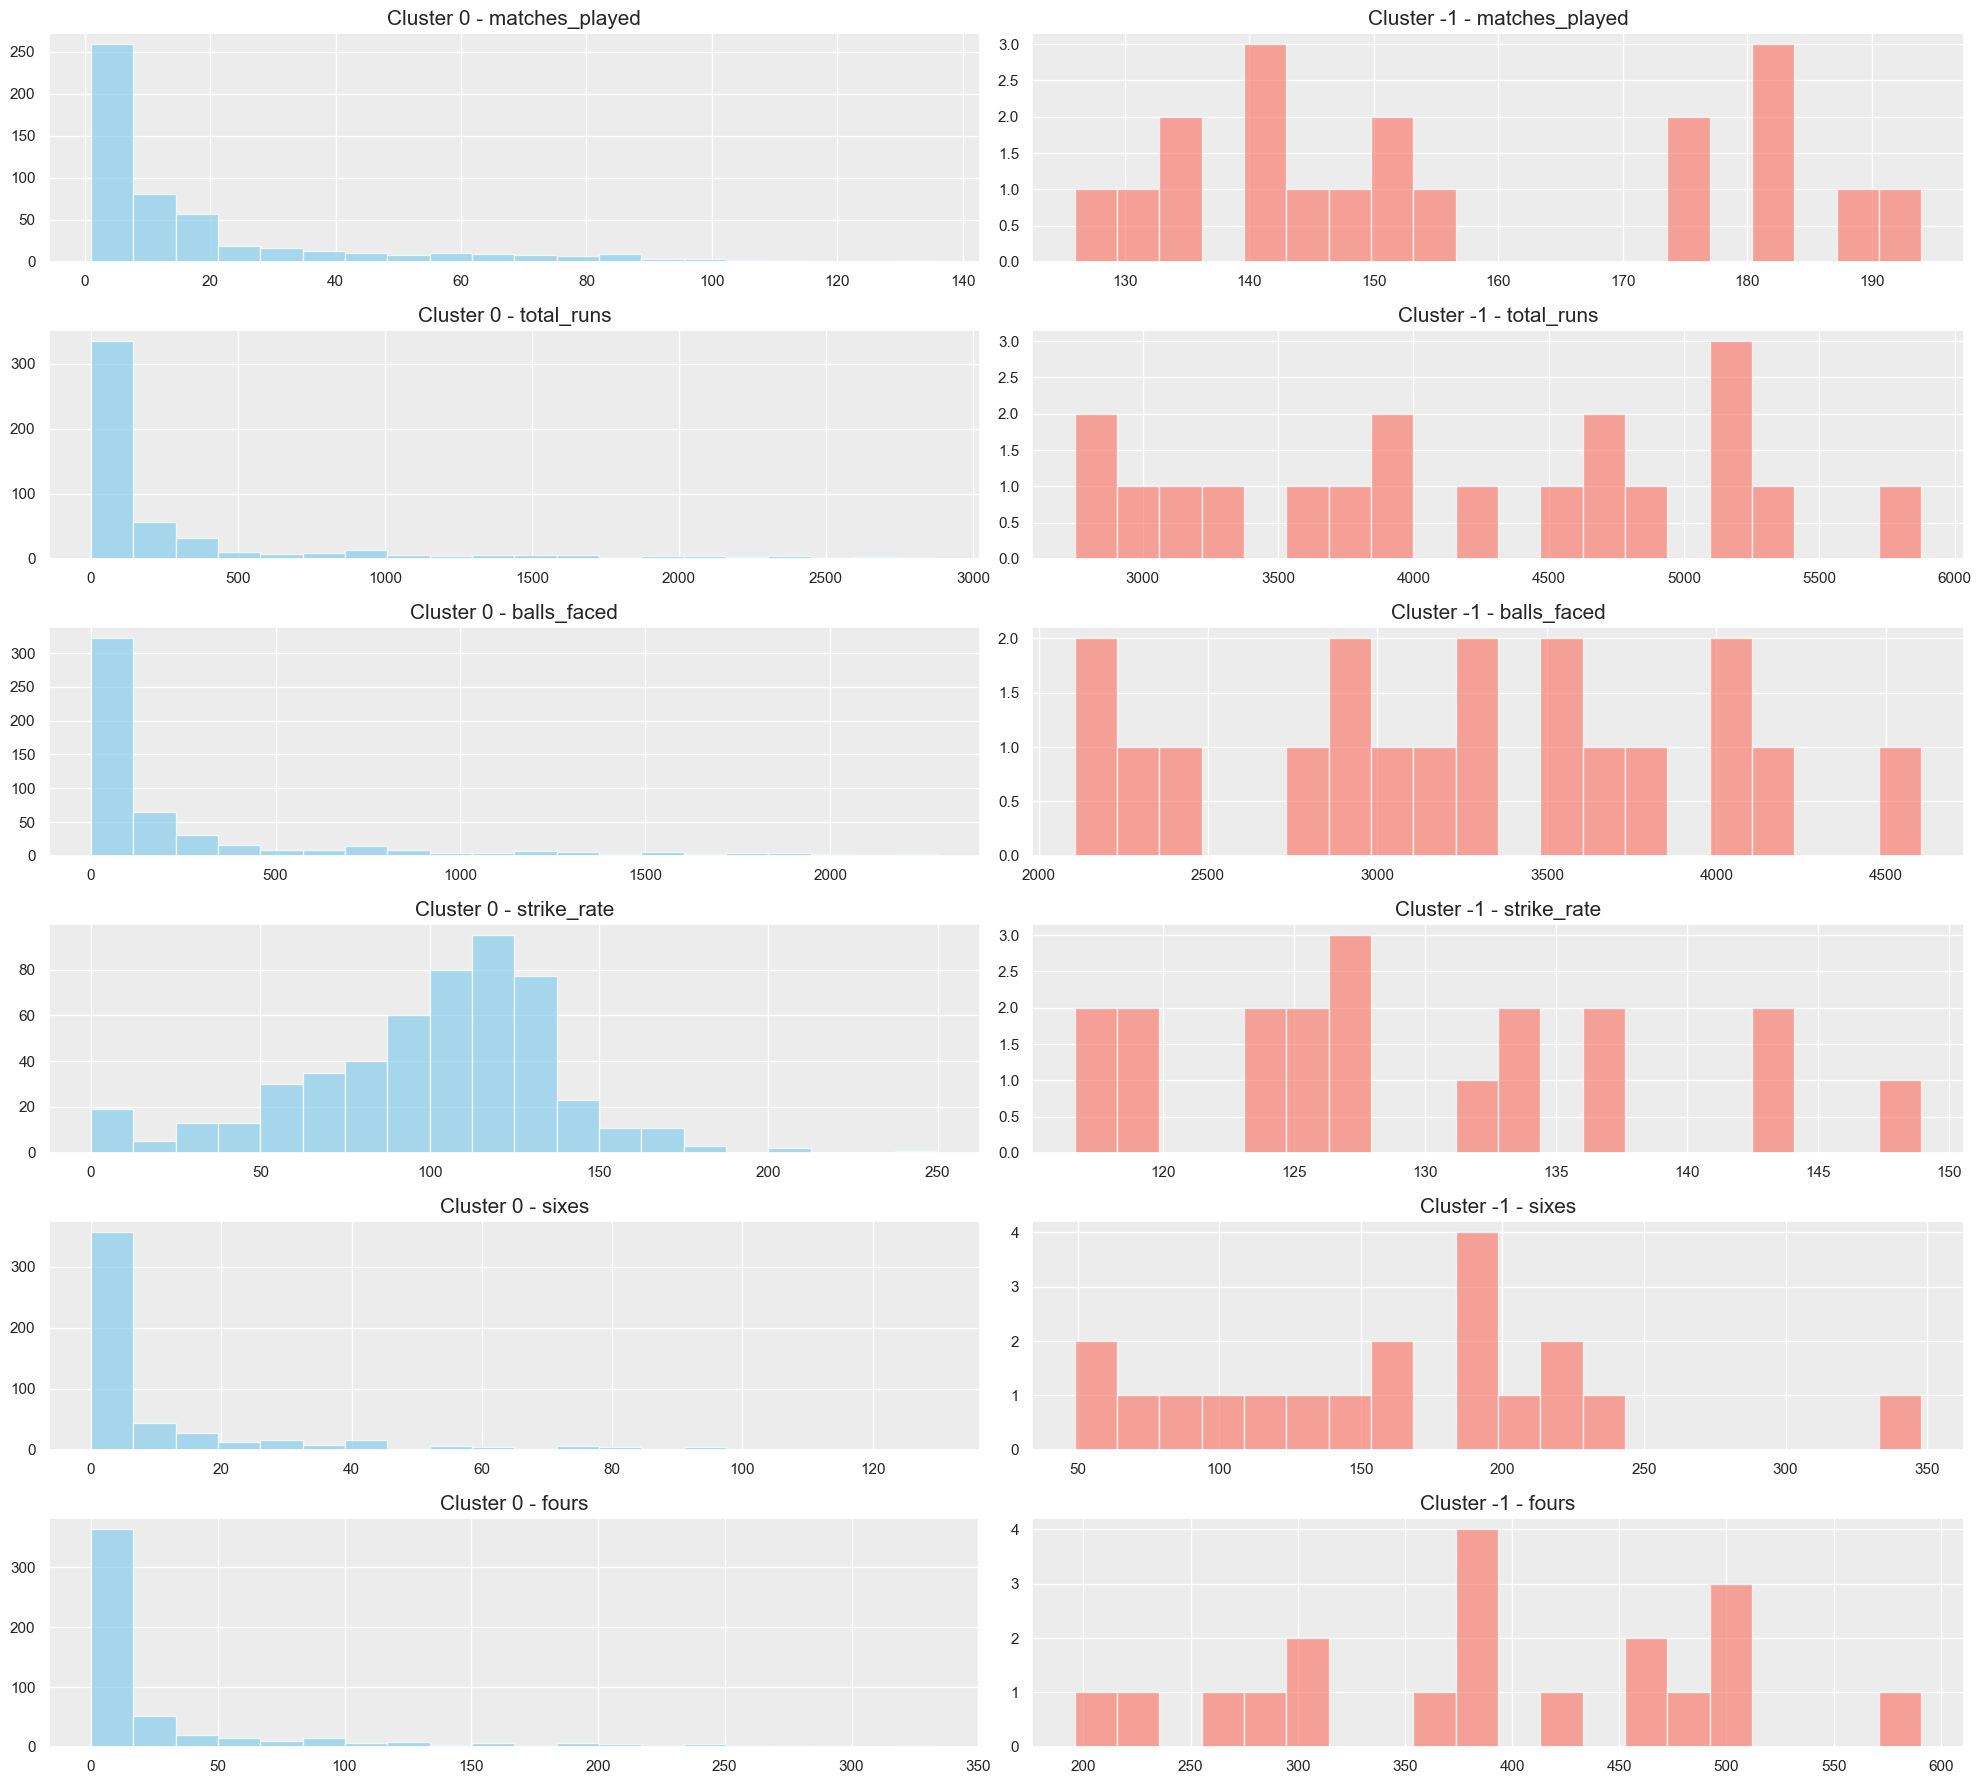

In [84]:
colors = ['skyblue', 'salmon']

# Define features and clusters
features = batsman_data_cleaned_DBSCAN.columns[1:-1]
clusters = [0, -1]

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = batsman_data_cleaned_DBSCAN[batsman_data_cleaned_DBSCAN['cluster'] == cluster][feature]
        if n_rows > 1:
            ax = axes[i, j]
        else:
            ax = axes[j]
        ax.hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

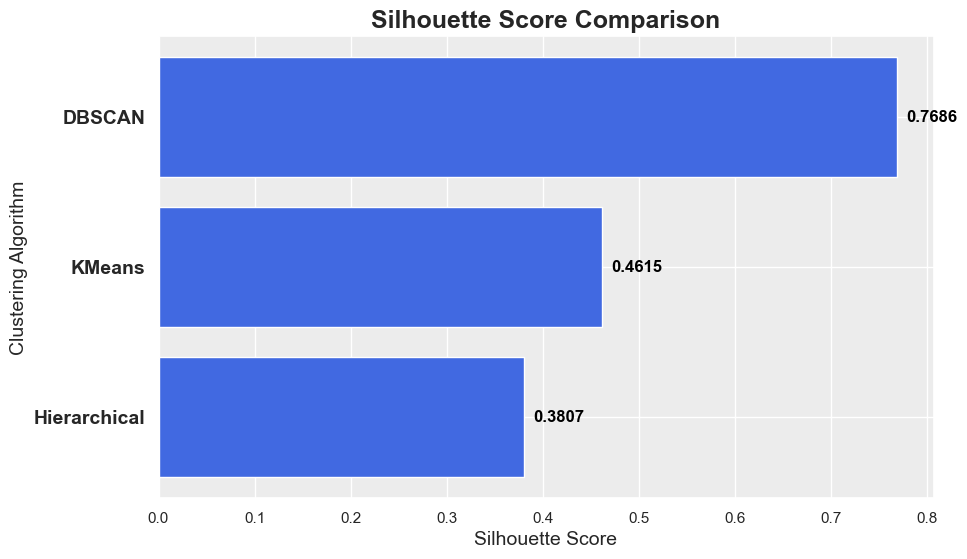

In [85]:
# Define the silhouette scores obtained from different clustering algorithms
silhouette_scores = {
    "KMeans": kmeans_silhouette_score,
    "Hierarchical": hierarchical_silhouette_score,
    "DBSCAN": dbscan_silhouette_score
}

# Convert silhouette scores to DataFrame for easier plotting
silhouette_df = pd.DataFrame.from_dict(silhouette_scores, orient='index', columns=['Silhouette Score'])

# Sort silhouette scores for better visualization
silhouette_df.sort_values(by='Silhouette Score', ascending=False, inplace=True)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(range(len(silhouette_df)), silhouette_df['Silhouette Score'], color='royalblue')

# Annotate the values outside the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.01, i, f'{width:.4f}', ha='left', va='center', fontweight='bold', color='black')

# Set y-axis labels and make them bold
ax.set_yticks(range(len(silhouette_df)))
ax.set_yticklabels(silhouette_df.index, fontsize=14, fontweight='bold')
ax.set_ylabel('Clustering Algorithm', fontsize=14)
# Set x-axis label
ax.set_xlabel('Silhouette Score', fontsize=14)

# Add title
plt.title("Silhouette Score Comparison", fontweight='bold', fontsize=18)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

plt.show()

In [86]:
# Filter the data to include only players with at least 100 matches and more than 2500 runs
filtered_data = batsman_data_cleaned_DBSCAN[(batsman_data_cleaned_DBSCAN['total_runs'] > 2500) & (batsman_data_cleaned_DBSCAN['matches_played'] >= 100)]

# Selecting desired columns
filtered_data_with_clusters = filtered_data[batsman_data_cleaned_DBSCAN.columns]


filtered_data_with_clusters.sort_values('total_runs', ascending=False).reset_index()

,index,batsman,matches_played,total_runs,balls_faced,strike_rate,sixes,fours,cluster
0,505,V Kohli,183,5877,4605,127.622150,202.0,504.0,-1
1,438,SK Raina,189,5368,4041,132.838406,194.0,493.0,-1
2,116,DA Warner,141,5235,3809,137.437648,193.0,509.0,-1
3,379,RG Sharma,194,5230,4088,127.935421,214.0,458.0,-1
4,407,S Dhawan,175,5197,4208,123.502852,109.0,591.0,-1
5,24,AB de Villiers,155,4792,3217,148.958657,234.0,381.0,-1
6,96,CH Gayle,130,4762,3338,142.660276,348.0,383.0,-1
7,301,MS Dhoni,182,4632,3493,132.608073,216.0,313.0,-1
8,398,RV Uthappa,182,4607,3658,125.943138,163.0,454.0,-1
9,154,G Gambhir,151,4217,3524,119.665153,59.0,492.0,-1


In [88]:
file_path = "ipl_top_batsmen_stats 2008-2020.csv"

# Save the DataFrame to CSV
filtered_data_with_clusters.to_csv(file_path, index=False)

print("DataFrame successfully saved to csv file:", file_path)

DataFrame successfully saved to csv file: ipl_top_batsmen_stats 2008-2020.csv
